In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

column_mapper = {
    "Q3.1": "prolific_id",
    "Duration (in seconds)": "duration",
    
    "Q5.7": "dt_q1",
    "Q5.13": "dt_q2",
    "Q5.14": "understood_system_did_well_dt",
    "Q5.15": "system_confusing_complicated_dt",
    "Q5.16": "system_confusing_confusing_dt",
    "Q5.17": "understood_system_easy_to_understand_dt",
    "Q5.18": "system_confusing_hard_to_remember_dt",
    "Q5.19": "understood_system_predictable_dt",
    "Q5.20": "understood_system_how_it_works_dt",
    "Q5.21": "understood_system_inputs_and_outputs_dt",
    
    "Q6.7": "lr_q1",
    "Q6.13": "lr_q2",
    "Q6.14": "understood_system_did_well_lr",
    "Q6.15": "system_confusing_complicated_lr",
    "Q6.16": "system_confusing_confusing_lr",
    "Q6.17": "understood_system_easy_to_understand_lr",
    "Q6.18": "system_confusing_hard_to_remember_lr",
    "Q6.19": "understood_system_predictable_lr",
    "Q6.20": "understood_system_how_it_works_lr",
    "Q6.21": "understood_system_inputs_and_outputs_lr",
    

    "Q7.7": "bb_no_shap_q1",
    "Q7.13": "bb_no_shap_q2",    
    "Q7.14": "understood_system_did_well_bb_no_shap",
    "Q7.15": "system_confusing_complicated_bb_no_shap",
    "Q7.16": "system_confusing_confusing_bb_no_shap",
    "Q7.17": "understood_system_easy_to_understand_bb_no_shap",
    "Q7.18": "system_confusing_hard_to_remember_bb_no_shap",
    "Q7.19": "understood_system_predictable_bb_no_shap",
    "Q7.20": "understood_system_how_it_works_bb_no_shap",
    "Q7.21": "understood_system_inputs_and_outputs_bb_no_shap",    
    
    "Q8.12": "bb_shap_q1",
    "Q8.18": "bb_shap_q2",
    "Q8.19": "understood_system_did_well_bb_shap",
    "Q8.20": "system_confusing_complicated_bb_shap",
    "Q8.21": "system_confusing_confusing_bb_shap",
    "Q8.22": "understood_system_easy_to_understand_bb_shap",
    "Q8.23": "system_confusing_hard_to_remember_bb_shap",
    "Q8.24": "understood_system_predictable_bb_shap",
    "Q8.25": "understood_system_how_it_works_bb_shap",
    "Q8.26": "understood_system_inputs_and_outputs_bb_shap"
}

In [99]:
education_survey_data = pd.read_csv("../data/bell_et_al/accuracy-explainability-tradeoff-main/survey/survey_response_data/Education+_+Understanding+Computing+Systems_May+8,+2022_15.37.csv")

education_survey_data = education_survey_data[2:].reset_index(drop=True)
cutoff_education = datetime.datetime.strptime('2021-08-23 22:50:00', "%Y-%m-%d %H:%M:%S")
education_survey_data['taken_in_appropiate_time_window'] = education_survey_data['RecordedDate'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") > cutoff_education)

education_survey_data = education_survey_data.rename(columns=column_mapper)
education_survey_data = education_survey_data[education_survey_data['taken_in_appropiate_time_window'] == True]
education_survey_data = education_survey_data[(education_survey_data['prolific_id'].notnull() & education_survey_data['prolific_id'] != "test")]
education_survey_data = education_survey_data[education_survey_data['Finished'] == "True"]
education_survey_data = education_survey_data[education_survey_data['prolific_id'] != '5b9811290f2cf000010f31fb']
education_survey_data = education_survey_data[education_survey_data['prolific_id'] != '5c57022635a46a0001682961']
education_survey_data.shape

(177, 80)

In [100]:
housing_survey_data = pd.read_csv("../data/bell_et_al/accuracy-explainability-tradeoff-main/survey/survey_response_data/Housing+_+Understanding+Computing+Systems_May+8,+2022_15.39.csv")

housing_survey_data = housing_survey_data[2:].reset_index(drop=True)
cutoff_housing = datetime.datetime.strptime('2021-08-25 00:03:00', "%Y-%m-%d %H:%M:%S")
housing_survey_data['taken_in_appropiate_time_window'] = housing_survey_data['RecordedDate'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") > cutoff_housing)

housing_survey_data = housing_survey_data.rename(columns=column_mapper)
housing_survey_data = housing_survey_data[housing_survey_data['taken_in_appropiate_time_window'] == True]
housing_survey_data = housing_survey_data[(housing_survey_data['prolific_id'].notnull() & housing_survey_data['prolific_id'] != "test")]
housing_survey_data = housing_survey_data[housing_survey_data['Finished'] == "True"]
housing_survey_data = housing_survey_data[housing_survey_data['prolific_id'] != '5b9811290f2cf000010f31fb']
housing_survey_data = housing_survey_data[housing_survey_data['prolific_id'] != '5c57022635a46a0001682961']
housing_survey_data.shape


(170, 80)

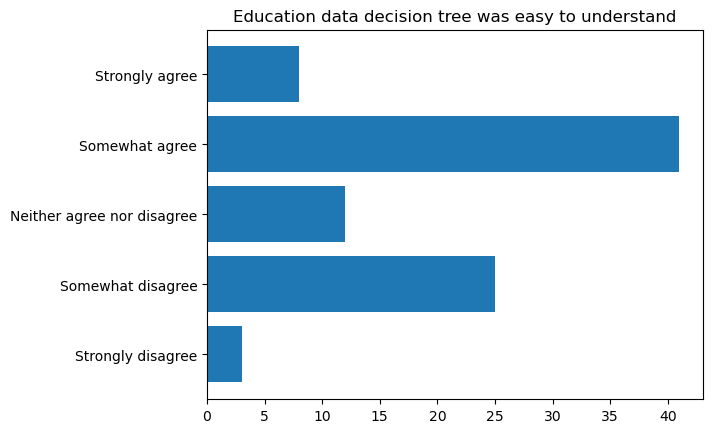

In [101]:
survey_options = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
survey_quantities = []

for i in range(5):
  survey_quantities.append(np.sum(np.array(education_survey_data['understood_system_easy_to_understand_dt']) == survey_options[i]))

plt.barh(survey_options, survey_quantities)
plt.title("Education data decision tree was easy to understand")

plt.show()

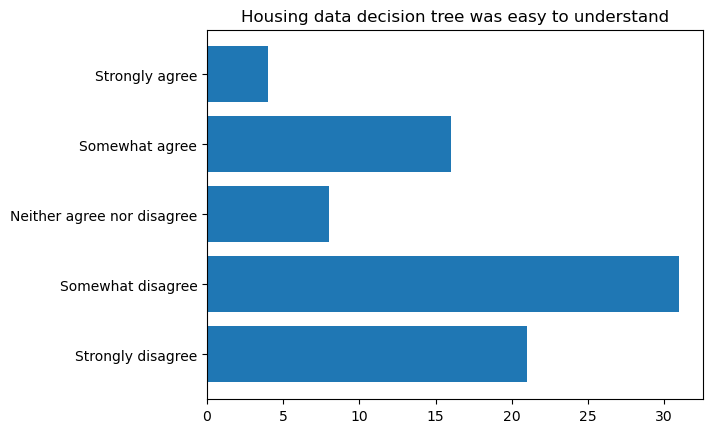

In [102]:
survey_options = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
survey_quantities = []

for i in range(5):
  survey_quantities.append(np.sum(np.array(housing_survey_data['understood_system_easy_to_understand_dt']) == survey_options[i]))

plt.barh(survey_options, survey_quantities)
plt.title("Housing data decision tree was easy to understand")

plt.show()

In [118]:
total_ed_dt_q1 = np.sum(education_survey_data["dt_q1"] == "Pass") + np.sum(education_survey_data["dt_q1"] == "Fail") + np.sum(education_survey_data["dt_q1"] == "I don't know")
passes = (np.array(education_survey_data["int_profile_2"]) == '1') | (np.array(education_survey_data["int_profile_2"]) == '3')
fails = (np.array(education_survey_data["int_profile_2"]) == '2') | (np.array(education_survey_data["int_profile_2"]) == '4')
print(passes & fails)
print(np.sum(education_survey_data["dt_q1"][passes] == "Pass") + np.sum(education_survey_data["dt_q1"][fails] == "Fail"), "/", total_ed_dt_q1)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa